# Radiosonde Module rasotools

    Author: M. Blaschek
    Last Update: Dec 2019
    Status: Development

    Version: 19.12

In [1]:
%matplotlib inline

In [2]:
import sys
sys.path.append('..') # if run from the doc directory

## Importing

In [3]:
import numpy as np
import pandas as pd
import xarray as xr
import rasotools as rt

In [4]:
print(rt.__file__)

../rasotools/__init__.py


## Configuration

There are two directories the module uses a lot
* rasodir
* outdir

Other important variables are:
* std_plevels
* rttov_profile_limits

In [5]:
# Show config informations
rt.config

homedir    : <str (/raid8/srvx1/mblaschek)>
wkdir      : <str (/raid8/srvx1/mblaschek/workspace/pybench/development/rasotools/doc)>
igradir    : <str ()>
marsdir    : <str ()>
outdir     : <str (/raid8/srvx1/mblaschek/workspace/pybench/development/rasotools/doc/results)>
rasodir    : <str (/raid8/srvx1/mblaschek/workspace/pybench/development/rasotools/doc/archive)>
std_plevels : <list (16)>
era_plevels : <list (32)>
rttov_profile_limits : <NoneType (None)>
libinfo    : <str (RT(0.4) NP(1.17.2) PD(0.25.1) XR(0.13.0))>

In [6]:
# Write Config to JSON file
rt.dump_config('test.json')

Configuration written:  test.json


In [7]:
# Load Config from JSON file
rt.load_config('test.json')

[CONFIG]  homedir : '/raid8/srvx1/mblaschek'
[CONFIG]  wkdir : '/raid8/srvx1/mblaschek/workspace/pybench/development/rasotools/doc'
[CONFIG]  igradir : ''
[CONFIG]  marsdir : ''
[CONFIG]  outdir : '/raid8/srvx1/mblaschek/workspace/pybench/development/rasotools/doc/results'
[CONFIG]  rasodir : '/raid8/srvx1/mblaschek/workspace/pybench/development/rasotools/doc/archive'
[CONFIG]  std_plevels : [1000.0, 2000.0, 3000.0, 5000.0, 7000.0, 10000.0, 15000.0, 20000.0, 25000.0, 30000.0, 40000.0, 50000.0, 70000.0, 85000.0, 92500.0, 100000.0]
[CONFIG]  era_plevels : [1000.0, 2000.0, 3000.0, 5000.0, 7000.0, 10000.0, 12500.0, 15000.0, 17500.0, 20000.0, 22500.0, 25000.0, 30000.0, 35000.0, 40000.0, 45000.0, 50000.0, 55000.0, 60000.0, 65000.0, 70000.0, 75000.0, 77500.0, 80000.0, 82500.0, 85000.0, 87500.0, 90000.0, 92500.0, 95000.0, 97500.0, 100000.0]
[CONFIG]  rttov_profile_limits : None
[CONFIG]  libinfo : 'RT(0.4) NP(1.17.2) PD(0.25.1) XR(0.13.0)'
[CONFIG]  test.json


In [8]:
# That's how it looks:
# Can be easily edited and adjusted to your local system
with open('test.json') as f:
    print("".join(f.read()))

{
"homedir": "/raid8/srvx1/mblaschek",
"wkdir": "/raid8/srvx1/mblaschek/workspace/pybench/development/rasotools/doc",
"igradir": "",
"marsdir": "",
"outdir": "/raid8/srvx1/mblaschek/workspace/pybench/development/rasotools/doc/results",
"rasodir": "/raid8/srvx1/mblaschek/workspace/pybench/development/rasotools/doc/archive",
"std_plevels": [
1000.0,
2000.0,
3000.0,
5000.0,
7000.0,
10000.0,
15000.0,
20000.0,
25000.0,
30000.0,
40000.0,
50000.0,
70000.0,
85000.0,
92500.0,
100000.0
],
"era_plevels": [
1000.0,
2000.0,
3000.0,
5000.0,
7000.0,
10000.0,
12500.0,
15000.0,
17500.0,
20000.0,
22500.0,
25000.0,
30000.0,
35000.0,
40000.0,
45000.0,
50000.0,
55000.0,
60000.0,
65000.0,
70000.0,
75000.0,
77500.0,
80000.0,
82500.0,
85000.0,
87500.0,
90000.0,
92500.0,
95000.0,
97500.0,
100000.0
],
"rttov_profile_limits": null,
"libinfo": "RT(0.4) NP(1.17.2) PD(0.25.1) XR(0.13.0)"
}


# Reading Example Radiosonde Data

Source: IGRAv2 from NOAA

In [9]:
# Example IGRAv2 Sounding File for Vienna
isonde = rt.open_radiosonde('example')

Warning different idents:  AUM00011035 > 011035


## Radiosonde Class

In [10]:
isonde

Radiosonde (AUM00011035)
Data: 
IGRAv2     : <Dataset (9 vars [date(738), pres(32)])>
Global Attributes: 
ident      : <str (011035)>
source     : <str (NOAA NCDC)>
dataset    : <str (IGRAv2)>
levels     : <str (ERA-I 32 lower)>
processed  : <str (UNIVIE, IMG)>
libs       : <str (RT(0.2) NP(1.15.4) PD(0.23.4) XR(0.11.0))>

## IGRA Radiosonde data

Notice that IGRA sounding data has 32 level.  
These levels are interpolated to the lower 32 ERA-Interim pressure levels

In [11]:
# Data is stored in Netcdf and read with XARRAY
isonde.data.IGRAv2

<xarray.Dataset>
Dimensions:  (date: 738, pres: 32)
Coordinates:
  * date     (date) datetime64[ns] 2016-01-01 ... 2016-12-31T12:00:00
  * pres     (pres) float64 1e+03 2e+03 3e+03 5e+03 ... 9.5e+04 9.75e+04 1e+05
Data variables:
    gph      (date, pres) float64 ...
    temp     (date, pres) float64 ...
    rhumi    (date, pres) float64 ...
    dpd      (date, pres) float64 ...
    windd    (date, pres) float64 ...
    winds    (date, pres) float64 ...
    numlev   (date) int64 ...
    lat      (date) float64 ...
    lon      (date) float64 ...
Attributes:
    ident:      011035
    source:     NOAA NCDC
    dataset:    IGRAv2
    levels:     ERA-I 32 lower
    processed:  UNIVIE, IMG
    libs:       RT(0.2) NP(1.15.4) PD(0.23.4) XR(0.11.0)

Writing xarray data to NetCDF 

In [12]:
isonde.to_netcdf('IGRAv2', directory='/tmp/tutorial', verbose=1)

to dir: /tmp/tutorial
makedir:  /tmp/tutorial
Writing /tmp/tutorial/IGRAv2.nc


In [15]:
!ls -lh /tmp/tutorial/IGRAv2.nc

-rw-r--r--. 1 mblaschek users 501K  6. Dez 13:35 /tmp/tutorial/IGRAv2.nc


Reading again the NetCDF data to the Radiosonde

In [16]:
isonde.add('IGRA', filename='/tmp/tutorial/IGRAv2.nc', verbose=1)

./AUM00011035/
Reading ... /tmp/tutorial/IGRAv2.nc
Warning different idents:  AUM00011035 > 011035


In [17]:
isonde.data

IGRAv2     : <Dataset (9 vars [date(738), pres(32)])>
IGRA       : <Dataset (9 vars [date(738), pres(32)])>

In [18]:
del isonde.data['IGRA']   #removing it

### Read Raw ASCII IGRA or UADB Tables into rasotools

Simply reading the ASCII file and splitting data and header informations works with the module [igra](https://github.com/MBlaschek/igra)

In [25]:
import igra
data,station = igra.read.igra('AUM00011035', filename='AUM00011035-data.txt.gz', verbose=1)                                       

[AUM00011035] [2019-12-06T14:05:21.243760] AUM00011035 [1000.0, 2000.0, 3000.0, 5000.0, 7000.0, 10000.0, 15000.0, 20000.0, 25000.0, 30000.0, 40000.0, 50000.0, 70000.0, 85000.0, 92500.0, 100000.0]
[AUM00011035] [2019-12-06T14:05:21.244050] Reading ascii data into dataframes
[AUM00011035] [2019-12-06T14:05:21.368238] IGRAv2 Lines read: 34480 Header count: 321
[AUM00011035] [2019-12-06T14:05:21.477490] Missing pressure values 0
[AUM00011035] [2019-12-06T14:05:21.477594] Interpolating to standard pressure levels
[AUM00011035] [2019-12-06T14:05:22.252566] (34160, 7)  >>  (34544, 8)
[AUM00011035] [2019-12-06T14:05:22.253665] Converting to xarray
[AUM00011035] [2019-12-06T14:05:22.257742] Adding Metadata
[AUM00011035] [2019-12-06T14:05:22.258472] Converting temperature and humidity
[AUM00011035] [2019-12-06T14:05:22.263023] Collecting Station information


In [26]:
data

<xarray.Dataset>
Dimensions:   (date: 321, pres: 16)
Coordinates:
  * date      (date) datetime64[ns] 2015-01-23T12:00:00 ... 2015-06-30T12:00:00
  * pres      (pres) float64 1e+03 2e+03 3e+03 5e+03 ... 8.5e+04 9.25e+04 1e+05
Data variables:
    gph       (date, pres) float64 3.059e+04 2.622e+04 2.369e+04 ... 853.0 nan
    temp      (date, pres) float64 218.1 213.3 215.5 217.5 ... 285.2 291.8 nan
    rhumi     (date, pres) float64 nan nan nan nan nan ... nan nan nan nan nan
    dpd       (date, pres) float64 25.0 23.0 24.0 24.0 25.0 ... 2.7 9.0 10.0 nan
    windd     (date, pres) float64 235.0 240.0 215.0 300.0 ... 315.0 280.0 nan
    winds     (date, pres) float64 15.0 8.0 7.0 6.0 5.0 ... 11.0 5.0 4.0 nan
    flag_int  (date, pres) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 1.0
Attributes:
    ident:         AUM00011035
    source:        NOAA NCDC
    dataset:       IGRAv2
    processed:     UNIVIE, IMG
    interpolated:  to pres levs (#16)

In [27]:
station

<xarray.Dataset>
Dimensions:  (date: 321)
Coordinates:
  * date     (date) datetime64[ns] 2015-01-23T12:00:00 ... 2015-06-30T12:00:00
Data variables:
    numlev   (date) int64 123 104 104 81 88 99 108 ... 41 74 109 107 87 80 121
    lat      (date) float64 48.23 48.23 48.23 48.23 ... 48.23 48.23 48.23 48.23
    lon      (date) float64 16.35 16.35 16.35 16.35 ... 16.35 16.35 16.35 16.35
Attributes:
    ident:      AUM00011035
    source:     NOAA NCDC
    dataset:    IGRAv2
    processed:  UNIVIE, IMG

In [30]:
df,infos = igra.read.ascii_to_dataframe(filename='AUM00011035-data.txt.gz', verbose=1)                                       

IGRAv2 Lines read: 34480 Header count: 321


In [31]:
df

,pres,gph,temp,rhumi,dpd,windd,winds
date,,,,,,,
2015-01-23 12:00:00,99200,NaN,3.8,NaN,2.2,300.0,5.0
2015-01-23 12:00:00,97700,NaN,NaN,NaN,NaN,300.0,11.0
2015-01-23 12:00:00,95800,NaN,NaN,NaN,NaN,315.0,13.0
2015-01-23 12:00:00,94700,NaN,0.8,NaN,0.2,NaN,NaN
2015-01-23 12:00:00,92500,763.0,0.6,NaN,0.2,340.0,12.0
...,...,...,...,...,...,...,...
2015-06-30 12:00:00,1140,NaN,NaN,NaN,NaN,75.0,16.0
2015-06-30 12:00:00,1080,NaN,-35.1,NaN,38.0,NaN,NaN
2015-06-30 12:00:00,1010,NaN,NaN,NaN,NaN,80.0,19.0


In [32]:
infos

,numlev,lat,lon
date,,,
2015-01-23 12:00:00,123,48.2333,16.35
2015-01-24 00:00:00,104,48.2333,16.35
2015-01-24 12:00:00,104,48.2333,16.35
2015-01-25 00:00:00,81,48.2333,16.35
2015-01-25 12:00:00,88,48.2333,16.35
...,...,...,...
2015-06-28 12:00:00,109,48.2333,16.35
2015-06-29 00:00:00,107,48.2333,16.35
2015-06-29 12:00:00,87,48.2333,16.35


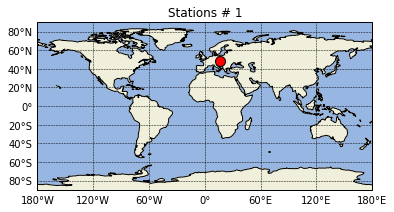

In [25]:
m = rt.plot.map.points(xdata.lon.values[0], xdata.lat.values[0], markersize=100)
m.set_global()